# Warm Weather and Despression

# Overview

In this project, we looked at the relationship between warm weather and the rate of depression for 49 states in the United States between 2015-2020. After collecting the temperature data from a weather repository and the depression data from America's Health Rankings, we ran visualizations by region to get a better understanding each state's data. Then we created scatterplots with the best fit regression model line to find the general trend between the variables and conducted two ANOVA tests to support our findings. Ultimately, we found that there is a negative correlation between the variables, however, we cannot formally conclude that more warm months decrease the rate of depression from our data alone. 



# Names

- Anthony Quiroga
- June Stancil
- Lucy Lee
- Millan Kanaya
- Samuel Lee

<a id='research_question'></a>
# Research Question

How will the prevalence of depression be affected by the number of warm months (average temperature above 68F) for each state of the United States?

<a id='background'></a>

## Background & Prior Work

Research often aims to find the definitive underlying causes behind mental health conditions, such as genetics and trauma, yet have we missed some important correlations that may help highlight a pattern for certain mental health illnesses? For instance, are certain kinds of climates correlated with the higher prevalence of mental health conditions? We aim to find if this correlation does in fact exist. 
While there are a wide range of physical conditions to study, we are primarily looking at depression.

There are many types of depressive disorders that range in severity and duration. Studies have pointed to genetics as well as traumatic life experiences to be at the core of this disorder. Tangible areas of depression that may affect an individual include performance on day-to-day activities as well as skewing overall thought processes and feelings<sup>1</sup>. Symptoms greatly range from persistent sadness or an “empty” mood to suicidal thoughts<sup>1</sup>. To be diagnosed, an individual must be regularly experiencing symptoms for at least two weeks<sup>1</sup>. Treatments for depressive disorders are medication, psychotherapy, or both <sup>1</sup>. According to the National Institute of Mental Health, an estimated 17.3 million Americans suffer from at least one major depressive episode<sup>2</sup>. Some indirect research involving climate and depression has been conducted when looking at Seasonal Affective Disorder (SAD); this is a type of depression that is characterized specifically in relation to changes in seasons. Studies have shown that individuals with SAD are more likely to experience depressive symptoms starting in the fall through the winter, when less sunlight is available<sup>3</sup>. 


References (include links):
- 1) https://www.nimh.nih.gov/health/topics/depression/index.shtml 
- 2) https://www.nimh.nih.gov/health/statistics/major-depression.shtml 
- 3) https://www.mayoclinic.org/diseases-conditions/seasonal-affective-disorder/symptoms-causes/syc-20364651 
- 4) https://link.springer.com/article/10.1007/s00038-009-0112-0 

# Hypothesis


We anticipate that the mental well-being of an individual will be heavily affected by the number of warm months. We expect that there will be a negative correlation between warmer temperature and the prevalence of depression.

The reason why we expect warmer temperature to decrease the likelihood of getting this negative mental condition is because many prior studies have implied this correlation. One article<sup>4</sup> claims that climate change may change one’s mental health in direct and indirect ways, such as impacting physical health with overexposure and affecting community well-being with environmental degradation. Moreover, Seasonal Affective Disorder effectively supports our hypothesis that the mental well-being of an individual can heavily depend on the local climate. Since we expect negative correlations between warm weather and depression, we expect more individuals with depression on the East Coast of the United States, where the weather is relatively cooler, compared to the West Coast, where the weather is warmer throughout the year. 

# Dataset(s)

We have 2 types of data. We have weather data, consisting of 49 states (all states but Hawaii) and their average monthly temperature for each month in 2015-2020. We also have depression data, with the rate of depression in each of the 49 states (all states but Hawaii) for each year in 2015-2020.


- Dataset Name: state-avg-temp-data/STATE-avg-temp-2015-2020.csv
- Link to the dataset: https://www.ncdc.noaa.gov/cag/statewide/time-series/1/tavg/all/12/2010-2020?base_prd=true&begbaseyear=1901&endbaseyear=2000
- Number of observations: 72 rows per state's dataset

In total we used 49 weather datasets (all states but Hawaii) and each state's CSV was labeled the same way, formatted with the same variables, taken from the same website, and had the same number of observations. Each state's CSV included the state name, the average temperature per month, the year and month, and the anomaly (which we will not be considering for our analysis since we will be counting the number of warm months, not their fluctuation). We merged the 49 datasets into one dataframe.


- Dataset Name: Depression Yearly Data.xlsx
- Link to the dataset: https://www.americashealthrankings.org/explore/annual/measure/Depression_a/state/ALL?edition-year=2020
- Number of observations: 49 observations per year of depression data (accounting for each state except Hawaii and the District of Columbia)

In total we used 6 depression datasets (spanning from 2015-2020) and each dataset had the same number of observations, was formatted with the same variables, and was taken from the same website. Each year of depression data included the following variables: Index, Edition, Report Type, Measure Name, State Name, Rank, Value, Score, Lower CI, Upper CI, Source, and Source Year. We merged the 6 depression datasets into one dataframe.
We will be dropping the Index column (because it is redundant, the pandas dataframe also has an index), Report Type (which gives the same information as Edition), Measure Name (they are all measuring depression), Score (we couldn’t infer from documentation on what exactly these values indicate, so we can’t make any observations with this data due to the uncertainty of it), Lower and Upper CI (these statistics are not needed for our analysis), Source (not needed for analysis), and Source Year (doing analysis based on Edition (year) as source year was redundant and not needed). 


We will not combine the weather and depression datasets. However, we plan to leverage the temperature data to count warm months which we will then combine with the depression dataset to use for visualizations (these datasets will relate to each other in terms of year, state, and eventually region).

# Setup

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime

# Data Cleaning

General Cleaning Steps: We first imported the weather dataset by running it through two functions (since each state's weather was downloaded separately), then we extracted the number of warm months (above 68F) for each of the states and put that data into a new DataFrame. Then we imported the depression data and removed the states (Hawaii and District of Columbia) that we would not study further. Both the warm month and depression datasets were run through a region function (to give each state its corresponding region) and combined into one DataFrame for analysis.

In [2]:
# Function to reformat weather data csv
# returns clean dataframe containing variables 
# "Year", "Date", "State", "Avg_Temp(F) <- (was Value)"
def reformat_csv(csv_str, state):
    df = pd.read_csv(csv_str)
    
    # drop 'Anomaly' column because we do not need
    # this column for our research question
    df = df.drop(columns='Anomaly')
    
    # Add state column 
    df['State'] = state
    
    # reformat Date
    df['Date'] = pd.to_datetime(df['Date'], format="%Y%m").dt.to_period('M')
    # add a new column for year
    df['Year'] = df['Date'].dt.year
    
    #rename column from "value" to "Avg(average)_Temp(erature)" for better clarification
    df = df.rename({"Value":"Avg_Temp(F)"}, axis='columns')
    
    #reformat dataframe to match depression dataframe style
    df = df[["Year", "Date", "State", "Avg_Temp(F)"]]
    
    return df

In [3]:
# function takes in state as argument and outputs a combined dataframe with all variables
def combine_df(states):
    df = []
    part_csv = "state-avg-temp-data/"
    part2_csv = "-avg-temp-2015-2020.csv"
    
    # creates csv string and calls refomat_csv function to create the dataframe based on state
    # adds data frame to a list
    for s in states:
        csv = part_csv + s + part2_csv
        df.append(reformat_csv(csv, s))
        
    # concatenates all data frames into one as weather data frame.
    combined_df = pd.concat(df, axis=0)
    combined_df = combined_df.reset_index(drop = True)
    return combined_df

In [4]:
# all states, except for Hawaii
state = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
         "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", 
         "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
weather = combine_df(state)

# weather dataframe
weather

,Year,Date,State,Avg_Temp(F)
0,2015,2015-01,AL,43.6
1,2015,2015-02,AL,41.3
2,2015,2015-03,AL,57.8
3,2015,2015-04,AL,66.0
4,2015,2015-05,AL,71.8
...,...,...,...,...
3523,2020,2020-08,WY,67.8
3524,2020,2020-09,WY,55.5
3525,2020,2020-10,WY,41.1
3526,2020,2020-11,WY,33.0


In [5]:
# no nulls present
print(weather.isnull().sum())

# our weather df has a reasonable range of weather values, so no further cleaning is needed
weather.describe()

Year           0
Date           0
State          0
Avg_Temp(F)    0
dtype: int64


,Year,Avg_Temp(F)
count,3528.000000,3528.000000
mean,2017.500000,53.059382
std,1.708067,17.842177
min,2015.000000,-6.200000
25%,2016.000000,39.400000
50%,2017.500000,54.300000
75%,2019.000000,68.000000
max,2020.000000,85.900000


In [6]:
# finding the months with temperature averages above 68F (room temperature)
# 1 represents months with average temperature above 68F
# 0 represents months with average temperature below 68F
warm = []

for i in range(len(weather)):
    if weather['Avg_Temp(F)'][i] >= 68:
        warm.append(1)
    else:
        warm.append(0)
        
weather['Warm_Month'] = pd.DataFrame(warm)
weather.head()

,Year,Date,State,Avg_Temp(F),Warm_Month
0,2015,2015-01,AL,43.6,0
1,2015,2015-02,AL,41.3,0
2,2015,2015-03,AL,57.8,0
3,2015,2015-04,AL,66.0,0
4,2015,2015-05,AL,71.8,1


In [7]:
# grouped each state's warm months by year
grouped_weather = weather.groupby(['Year', 'State'])['Warm_Month'].sum()
warm_weather = pd.DataFrame(grouped_weather)
warm_weather = warm_weather.reset_index()
warm_weather

,Year,State,Warm_Month
0,2015,AK,0
1,2015,AL,5
2,2015,AR,5
3,2015,AZ,4
4,2015,CA,4
...,...,...,...
289,2020,VT,1
290,2020,WA,0
291,2020,WI,2
292,2020,WV,3


In [8]:
# reading in each sheet of an excel, sheet named based on edition
depression20 = pd.read_excel("depression-data/Depression Yearly Data.xlsx", sheet_name = '2020')
depression19 = pd.read_excel("depression-data/Depression Yearly Data.xlsx", sheet_name = '2019')
depression18 = pd.read_excel("depression-data/Depression Yearly Data.xlsx", sheet_name = '2018')
depression17 = pd.read_excel("depression-data/Depression Yearly Data.xlsx", sheet_name = '2017')
depression16 = pd.read_excel("depression-data/Depression Yearly Data.xlsx", sheet_name = '2016')
depression15 = pd.read_excel("depression-data/Depression Yearly Data.xlsx", sheet_name = '2015')

In [9]:
# combining each year of depression data 
depression = pd.concat([depression15, depression16, depression17, depression18, depression19, depression20],axis=0)
# reset the index after concatenating
depression = depression.reset_index()

# redefinining depression to only include variables of interest
depression = depression[['Edition', 'State Name', 'Rank', 'Value']]
depression = depression.rename(columns={'Edition': 'Year'})

# dataframe below
depression.head()

,Year,State Name,Rank,Value
0,2015,Alabama,39.0,21.3
1,2015,Alaska,5.0,15.6
2,2015,Arizona,23.0,18.7
3,2015,Arkansas,41.0,21.5
4,2015,California,2.0,13.3


In [10]:
# drop data for Hawaii and District of Columbia
depression = depression[depression['State Name'] != 'District of Columbia']
depression = depression[depression['State Name'] != 'Hawaii']

In [11]:
# add column 'State' to depression data to make it 
# easier to combine with temperature data
states_looped = state * 6
depression['State'] = states_looped
depression = depression[['Year', 'State Name', 'State', 'Rank', 'Value']]
depression.head()

,Year,State Name,State,Rank,Value
0,2015,Alabama,AL,39.0,21.3
1,2015,Alaska,AK,5.0,15.6
2,2015,Arizona,AZ,23.0,18.7
3,2015,Arkansas,AR,41.0,21.5
4,2015,California,CA,2.0,13.3


In [12]:
# no nulls present
print(depression.isnull().sum())

# our depression df has a reasonable range of depression rates, so no further cleaning is needed
depression.describe()

Year          0
State Name    0
State         0
Rank          0
Value         0
dtype: int64


,Year,Rank,Value
count,294.000000,294.000000,294.000000
mean,2017.500000,25.792517,19.441497
std,1.710737,14.213912,3.168162
min,2015.000000,1.000000,11.700000
25%,2016.000000,14.000000,17.100000
50%,2017.500000,26.000000,19.500000
75%,2019.000000,38.000000,21.700000
max,2020.000000,50.000000,28.800000


#### Add Region Column to the DataFrames

Since we have 49 different states for both depression and warm_weather DataFrame, we concluded that it would be more convenient to add the 'Region' column to both DataFrames to utilize it in the visualizations. Regions were determined by: https://www.nationalgeographic.org/maps/united-states-regions/#:~:text=A%20common%20way%20of%20referring,West%2C%20Southeast%2C%20and%20Midwest.

In [13]:
# make lists and split 49 states into regions they belong in
north_east= ['ME', 'MA', 'RI', 'CT', 'NH', 'VT', 'NY','PA', 'NJ', 'DE', 'MD']
south_east= ['WV', 'VA', 'KY', 'TN', 'NC', 'SC', 'GA', 'AL', 'MS', 'AR', 'LA', 'FL']
mid_west= ['OH', 'IN', 'MI', 'IL', 'MO', 'WI', 'MN', 'IA', 'KS','NE', 'SD', 'ND']
south_west= ['TX', 'OK', 'NM', 'AZ']
west= ['CO', 'WY', 'MT', 'ID', 'WA', 'OR', 'UT', 'NV', 'CA', 'AK']

# make a list of regions and names of regions to use them in the add_region_col function
region_list = [north_east, south_east, mid_west, south_west, west]
region_names = ['North East', 'South East', 'Mid West', 'South West', 'West']

In [14]:
# this function assigns region names in Region column
# based on the value in the State column
def add_region_col(data, region, region_name):
    for state in region:
        data.loc[data['State'] == state, 'Region'] = region_name

In [15]:
# Add Region column to depression DataFrame
depression['Region'] = depression['State']

# loop through all regions and give appropriate region
# values using the add_region_col function
for region, name in zip(region_list, region_names):
    add_region_col(depression, region, name)

# Take a look at the DataFrame
depression

,Year,State Name,State,Rank,Value,Region
0,2015,Alabama,AL,39.0,21.3,South East
1,2015,Alaska,AK,5.0,15.6,West
2,2015,Arizona,AZ,23.0,18.7,South West
3,2015,Arkansas,AR,41.0,21.5,South East
4,2015,California,CA,2.0,13.3,West
...,...,...,...,...,...,...
300,2020,Virginia,VA,10.0,17.0,South East
301,2020,Washington,WA,45.0,24.2,West
302,2020,West Virginia,WV,50.0,28.8,South East
303,2020,Wisconsin,WI,31.0,20.5,Mid West


In [16]:
# Add Region column to warm_weather DataFrame
warm_weather['Region'] = warm_weather['State']

# loop through all regions and give appropriate region
# values using the add_region_col function
for region, name in zip(region_list, region_names):
    add_region_col(warm_weather, region, name)

# Take a look at the DataFrame
warm_weather.head()

,Year,State,Warm_Month,Region
0,2015,AK,0,West
1,2015,AL,5,South East
2,2015,AR,5,South East
3,2015,AZ,4,South West
4,2015,CA,4,West


In [17]:
# our final dataframe merges together the depression and warm weather dataframes
combined = pd.merge(depression, warm_weather, on=['State', 'Year', 'Region'])

# there are no nulls present in this combined df
print(combined.isnull().sum())

# this is what the combined df looks like
combined.head()

Year          0
State Name    0
State         0
Rank          0
Value         0
Region        0
Warm_Month    0
dtype: int64


,Year,State Name,State,Rank,Value,Region,Warm_Month
0,2015,Alabama,AL,39.0,21.3,South East,5
1,2015,Alaska,AK,5.0,15.6,West,0
2,2015,Arizona,AZ,23.0,18.7,South West,4
3,2015,Arkansas,AR,41.0,21.5,South East,5
4,2015,California,CA,2.0,13.3,West,4


# Data Analysis & Results

Using the 'Region' column we added to the depression dataframe and warm_weather dataframe in data cleaning, we will divide the dataframes into 5 different dataframes each, according to the observations in the Region column. Since we have 49 different states, it would be difficult to analyze all of them effectively in one visualization. Therefore, dividing them into different regions will allow us to analyze the data visualization more conveniently and more clearly.

In [18]:
# warm weather dataframess per region
ww_west_df = warm_weather[warm_weather['Region']=='West']
ww_southeast_df = warm_weather[warm_weather['Region']=='South East']
ww_southwest_df = warm_weather[warm_weather['Region']=='South West']
ww_northeast_df = warm_weather[warm_weather['Region']=='North East']
ww_midwest_df = warm_weather[warm_weather['Region']=='Mid West']

# depression dataframes per region
d_west_df = depression[depression['Region']=='West']
d_southeast_df = depression[depression['Region']=='South East']
d_southwest_df = depression[depression['Region']=='South West']
d_northeast_df = depression[depression['Region']=='North East']
d_midwest_df = depression[depression['Region']=='Mid West']

## North East Region

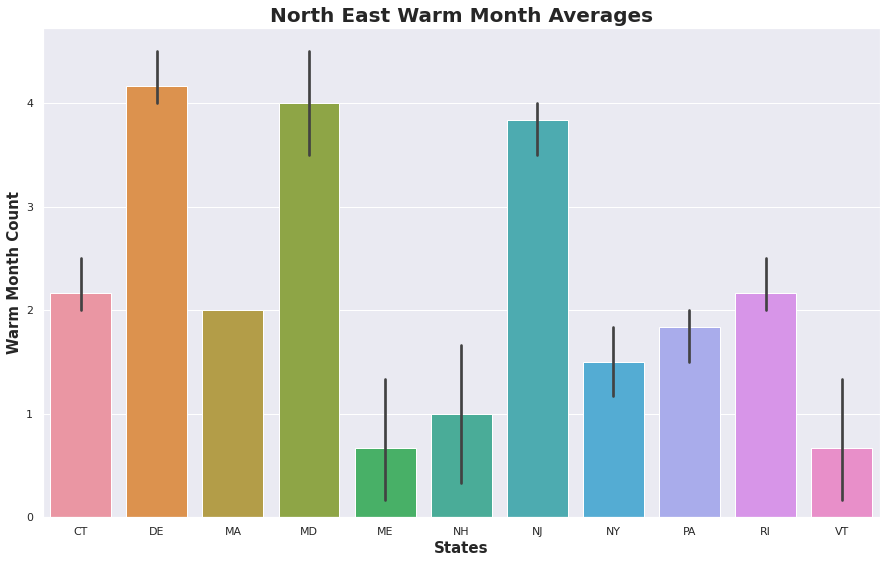

In [19]:
# set the size of the figure to be bigger
sns.set(rc={'figure.figsize':(15,9)})

# plot the average count of warm months in 2015~2020 for states within North East region
northeast_plot = sns.barplot(x='State', y='Warm_Month', data=ww_northeast_df)

# fine tune the plot
northeast_plot = plt.ylabel("Warm Month Count", size=15, fontweight='bold')
northeast_plot = plt.xlabel('States', size=15, fontweight='bold')
northeast_plot = plt.title('North East Warm Month Averages', size=20, fontweight='bold')

This graph shows the average number of warm months that appear in each state per year across the six years we are evaluating (2015-2020). As we can see, 4 of the states in the North East region hover around 2 warm months a year (CT, MA, PA, RI), but a few states, notably Delaware (DE), Maryland (MD), and New Jersey (NJ) have close to about 4 warm months per year, which is warmer than most of the North East region. There's also 4 states below the count of 2 warm months a year and that is Maine (ME), New Hampshire (NH), New York (NY), and Vermont (VT). With this in mind, we can now view the average rate of depression of these states across the years we are evaluating.

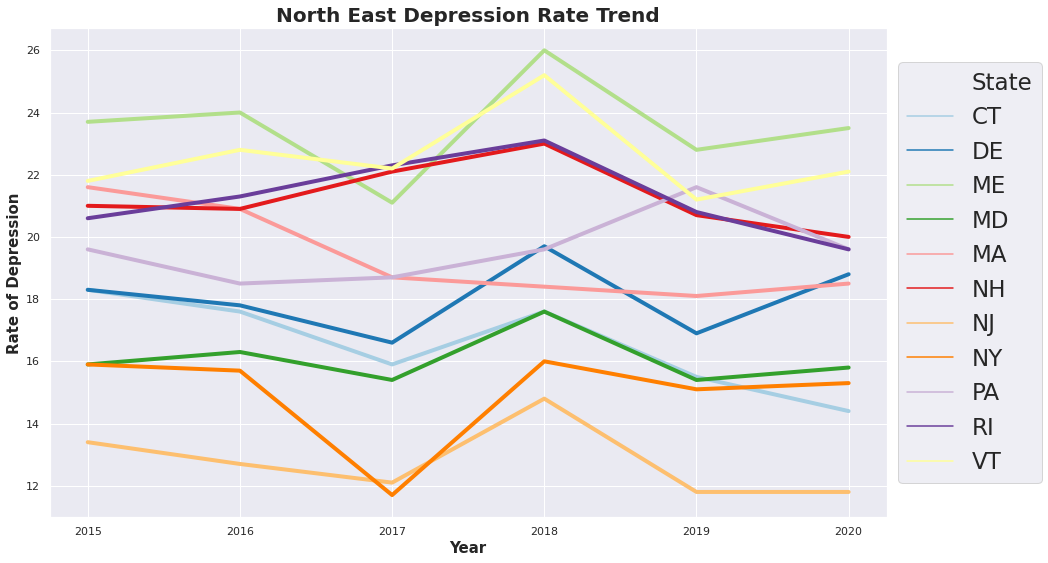

In [20]:
# plot the average depression rates of states within North East region from 2015 to 2020
ne_plot = sns.lineplot(data=d_northeast_df, x='Year', y='Value', hue='State', linewidth=4, palette="Paired")

# fine tune the plot
ne_plot = ne_plot.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=23)
ne_plot = plt.ylabel("Rate of Depression", size=15, fontweight='bold')
ne_plot = plt.xlabel('Year', size=15, fontweight='bold')
ne_plot = plt.title('North East Depression Rate Trend', size=20, fontweight='bold')

This graph gives the average rate of depression for each state in the North East region across the 6 years we are evaluating. As we see, there's quite a number of states with more warm months than the others in the region that have a lower rate of depression. Most notably, New Jersey has by far the lowest rate of depresion across the 6 years compared to any of the other states in the region by fluctuating between a rate of 12 to 15 over the 6 year span. To note, New Jersey has about 4 warm months a year on average. Of the warmer states we see in this region (North East), Maryland (MD) and Delaware (DE) have roughly lower rates than the rest of the states. MD fluctuates bewtween 16 and 18 for the rate of depression in the state, and DE fluctuates between 16 and 20 for the rate of depression. Overall these warmer states have a lower depression rate than most of the states, with colder states having a higher rate overall. Of the four colder states, Maine (ME), New Hampshire (NH), Vermont (VT), and New York (NY), with a warm month count less than 2 per year, fluctuate between the rates of 21-26 (ME), 20-23 (NH), and 21-25 (VT), with New York fluctuating between the rate of 12-16 being the only outlier of the cooler states. The rest of the states with an average warm month count of 2 fluctuate between a rate of 14-21 which is less than the colder states with less than 2 warm months a year, but close to and higher than some of the warmer states with 4 warm months a year.

Within this region, we can see that there's some relationship between the number of warm months a state has a year and the rate of depression the state has, but this region does not give a strong enough relationship yet to support this claim.  

## South West Region

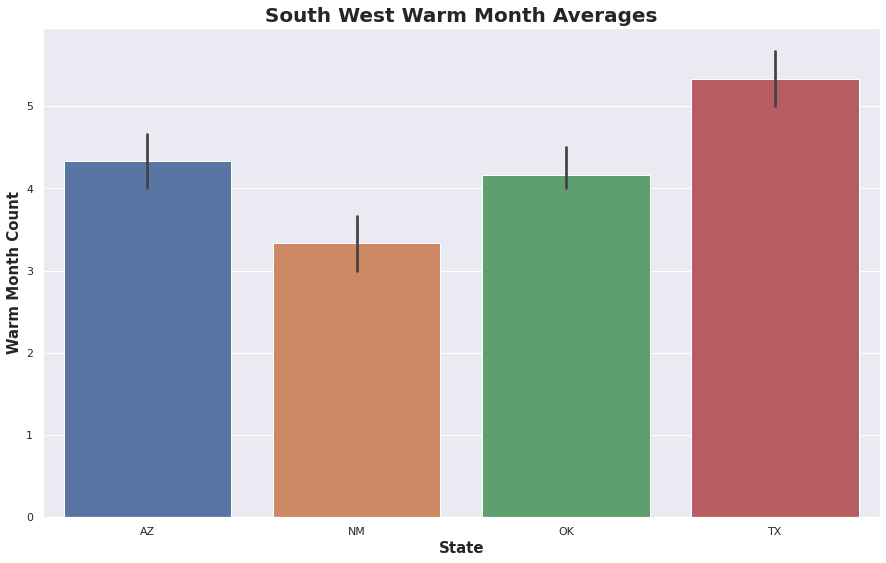

In [21]:
# plot the average count of warm months in 2015~2020 for states within South West region
southwest_plot = sns.barplot(x='State', y='Warm_Month', data=ww_southwest_df)
southwest_plot = plt.ylabel("Warm Month Count", size=15, fontweight='bold')
southwest_plot = plt.xlabel('State', size=15, fontweight='bold')
southwest_plot = plt.title('South West Warm Month Averages', size=20, fontweight='bold')

This graph shows the average number of warm months for the states in the southwest region from years 2015-2020. As seen in above, Texas (TX) is on the higher end averaging around 5 warm months a year, closely followed by Arizona (AZ) and Oklamhoma (OK) with around 4 warm months a year. New Mexico (NM) is slightly lower in count, hovering around 3 warm months a year. With the average warm months for this region established, we can now take a look at the average rate of depression for each of these states from years 2015-2020.

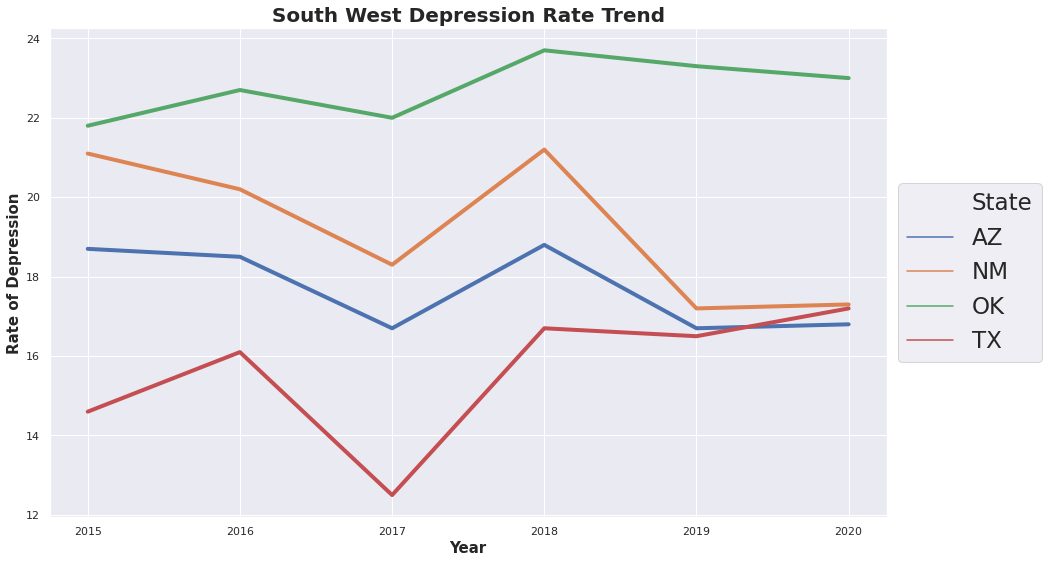

In [22]:
# plot the average depression rates of states within South West region from 2015 to 2020
sw_plot = sns.lineplot(data=d_southwest_df, x='Year', y='Value', hue='State', linewidth=4)
sw_plot = sw_plot.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=23)
sw_plot = plt.ylabel("Rate of Depression", size=15, fontweight='bold')
sw_plot = plt.xlabel('Year', size=15, fontweight='bold')
sw_plot = plt.title('South West Depression Rate Trend', size=20, fontweight='bold')

This graph shows the average rate of depression for the 4 states in the SouthWest region from years 2015-2020. We can see that Oklahoma (OK), with an average of about 4 warm months, has the highest rate of depression from this region, fluctuating between  22-24. Next, New Mexico (NM), with an average of around 3 warm months, fluctuates quite a bit from 17-21 throughout the 6 years. Arizona (AZ) fluctuates significantly less, hovering around the 17-19 range for rate of depression - it's average number of warm months was around 4. Lastly, Texas (TX) shows the lowest rate of depression, ranging from almost as low as 12 to about 17 from years 2015-2020 - this state had the highest average mumber of warm months per year for this region at around 5 months. 

From this region, the data from Texas (TX) specifically adds insight into the relationship between the number of warm months a state has per year and the rate of depression the state has. However, it's important to continue to look at the other regions as well to solidify this relationship.



## West Region

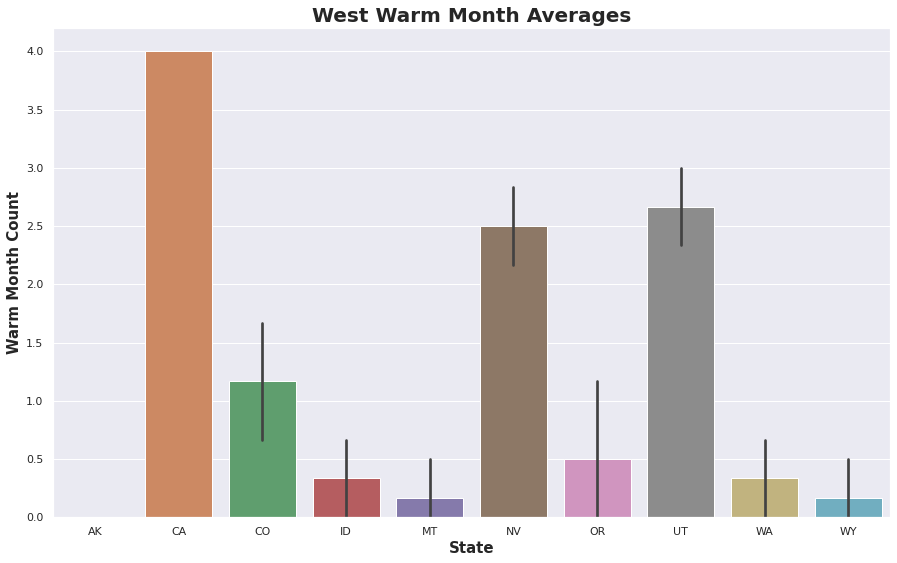

In [23]:
# plot the average count of warm months in 2015~2020 for states within West region
west_plot = sns.barplot(x='State', y='Warm_Month', data=ww_west_df);
west_plot = plt.ylabel("Warm Month Count", size=15, fontweight='bold')
west_plot = plt.xlabel('State', size=15, fontweight='bold')
west_plot = plt.title('West Warm Month Averages', size=20, fontweight='bold')

This graph shows the average number of warm months that appear in each state per year across the six years we are evaluating (2015-2020). As we can see, 2 of the states in the West region hover around 1 warm month a year (CO and OR), but a few states, notably California (CA), Nevada (NV), and Utah (UT) have close to about 3 warm months per year, which is warmer than most of the Western region. There's also 4 states below the count of 1 warm months a year and that is Idaho (ID), Montana (MT), Washington (WA), and Wyoming (WY). With this in mind, we can now view the average rate of depression of these states across the years we are evaluating.

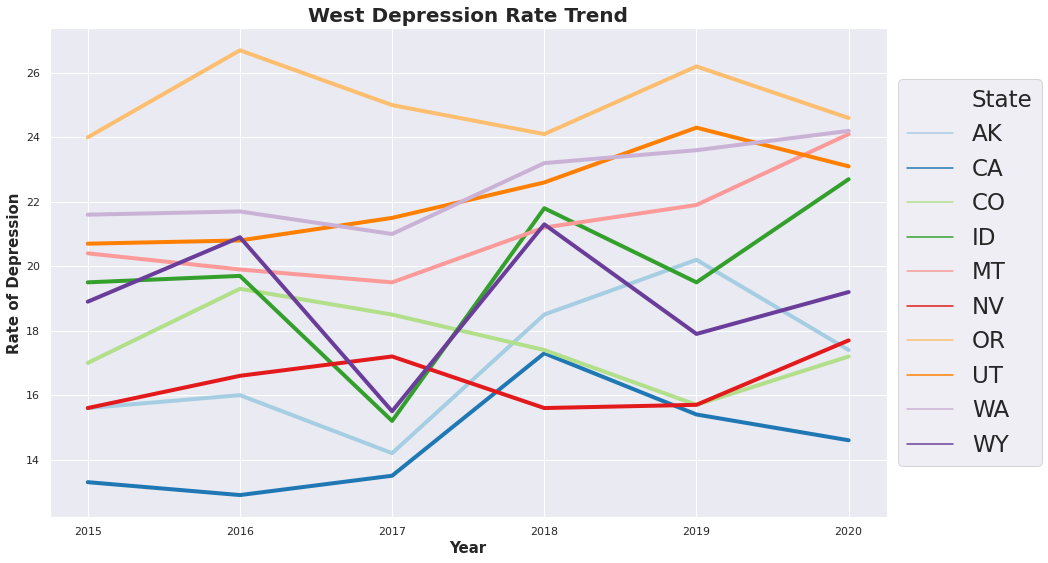

In [24]:
# plot the average depression rates of states within West region from 2015 to 2020
w_plot = sns.lineplot(data=d_west_df, x='Year', y='Value', hue='State', linewidth=4, palette='Paired')
w_plot = w_plot.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=23)
w_plot = plt.ylabel("Rate of Depression", size=15, fontweight='bold')
w_plot = plt.xlabel('Year', size=15, fontweight='bold')
w_plot = plt.title('West Depression Rate Trend', size=20, fontweight='bold')

This graph gives the average rate of depression for each state in the Western region across the 6 years we are evaluating. As we see, there's quite a number of states with more warm months than the others in the region that have a lower rate of depression. Most notably, California typically has lowest rate of depresion across the 6 years compared to any of the other states in the region by fluctuating between a rate of 13 to 17 over the 6 year span; California was also the state on the West Coast with the most warm months (average of 4). Furthermore, Nevada who also has several warm months a year (2.5 warm months) fluctutes around 16 but stays pretty consistent. On the other hand, Oregon is shown to have the highest rates of depression (around 24-26) for this region and has a low warm month count of 1. Generally speaking, based on this line plot we can see that the colder states typically have higher rates of depression; however, there are states (such as UT) with more warm months but still relatively high depression rates.  

Within this region, we can see that there's some relationship between the number of warm months a state has a year and the rate of depression the state has, but it this region does not give a strong enough relationship yet to support this claim. 

## Midwest Region

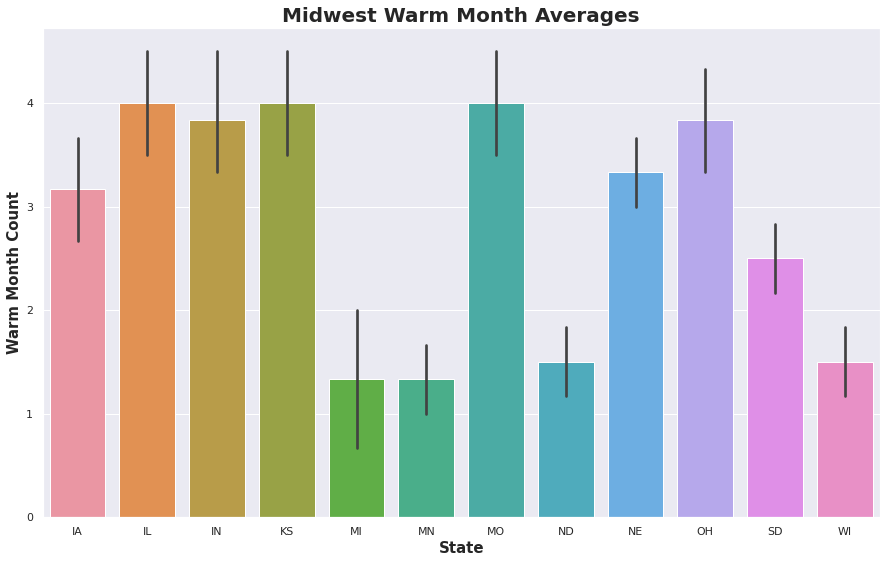

In [25]:
# plot the average count of warm months in 2015~2020 for states within Midwest region
midwest_plot = sns.barplot(x='State', y='Warm_Month', data=ww_midwest_df)
midwest_plot = plt.ylabel("Warm Month Count", size=15, fontweight='bold')
midwest_plot = plt.xlabel('State', size=15, fontweight='bold')
midwest_plot = plt.title('Midwest Warm Month Averages', size=20, fontweight='bold')

This graph shows the average number of warm months that appear in each state per year across the six years we are evaluating (2015-2020). As we can see, 4 of the states in the Midwest region hover around 1 warm month a year (MI, MN, ND, and WI), but a few states, notably Illinois (IL), Indiana (IN), Kansas (KS), Missouri (MO), and Ohio (OH) have close to about 4 warm months per year, which is warmer than most of the Midwestern region. Iowa (IA), Nebraska (NE), and South Dakota (SD) have warm month counts around 3, which is intermediate for this region. With this in mind, we can now view the average rate of depression of these states across the years we are evaluating.

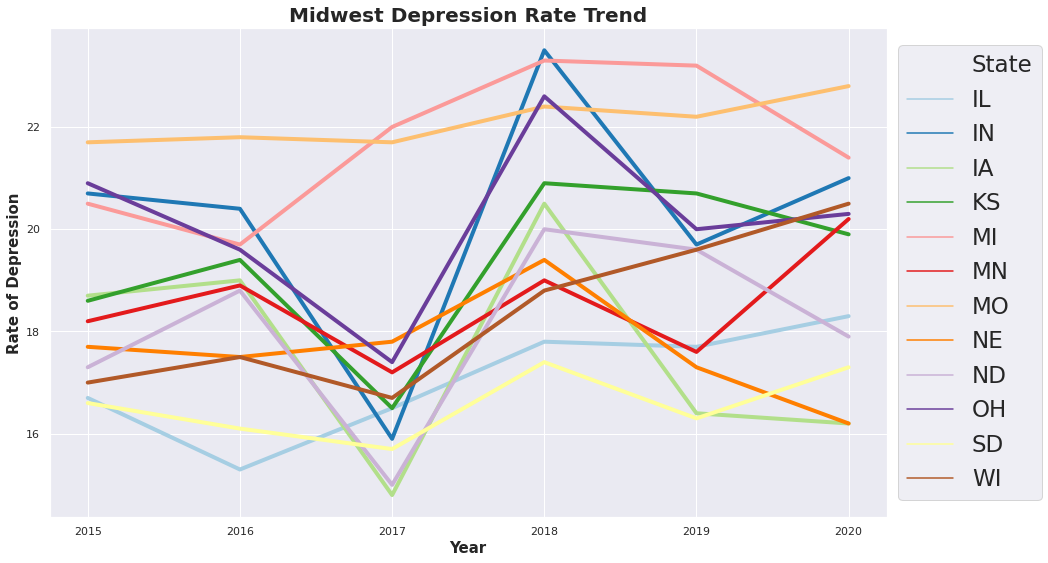

In [26]:
# plot the average depression rates of states within Midwest region from 2015 to 2020
mw_plot = sns.lineplot(data=d_midwest_df, x='Year', y='Value', hue='State', linewidth=4, palette = "Paired")
mw_plot = mw_plot.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=23)
mw_plot = plt.ylabel("Rate of Depression", size=15, fontweight='bold')
mw_plot = plt.xlabel('Year', size=15, fontweight='bold')
mw_plot = plt.title('Midwest Depression Rate Trend', size=20, fontweight='bold')

This graph gives the average rate of depression for each state in the Midwestern region across the 6 years we are evaluating. As we see, there's quite a lot of variability for this region in terms of depression rates aligning with warm months. Most notably, South Dakota is seen to have the lowest rate of depression (15-17) although it is not the warmest state in the region with an average warm month count of 2.5. On the flip, Missouri has a relatively high rate of depression although it is one of warmest states in the region with a warm month count of 4. Generally speaking, there is less of a visible trend with the Midwestern data in terms of depression rates. States with the lowest warm month counts (MI, MN, ND, and WI) do not consistently have the highest rates of depression, and there is also a sharp spike around 2018 for most states (most notably for Indiana, Ohio, Iowa, and North Dakota). 

Within this region, we can't really see a relationship between the number of warm months a state has a year and the rate of depression the state has.

## South East Region

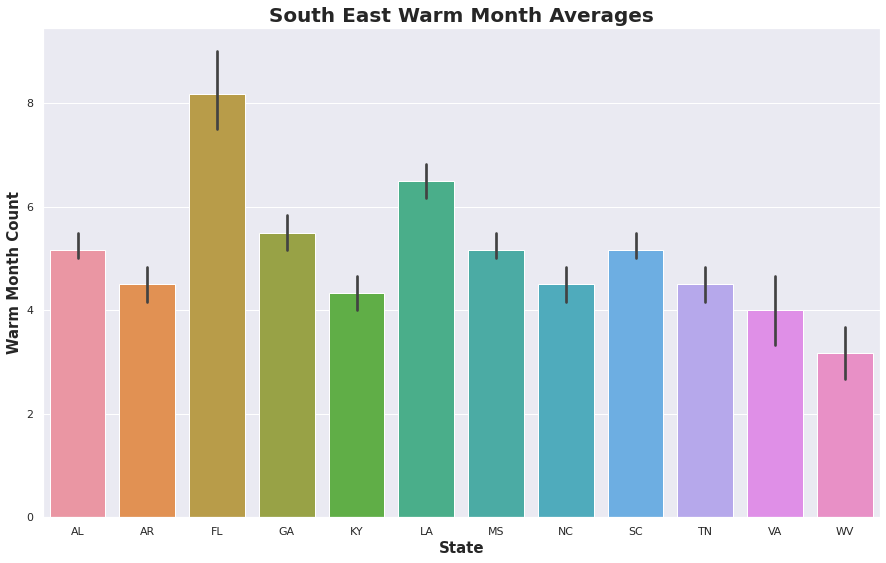

In [27]:
# plot the average count of warm months in 2015~2020 for states within South East region
southeast_plot = sns.barplot(x='State', y='Warm_Month', data=ww_southeast_df)
southeast_plot = plt.ylabel("Warm Month Count", size=15, fontweight='bold')
southeast_plot = plt.xlabel('State', size=15, fontweight='bold')
southeast_plot = plt.title('South East Warm Month Averages', size=20, fontweight='bold')

This graph shows the average number of warm months that appear in each state per year across the six years we are evaluating (2015-2020). As we can see, 6 of the states in the South East region hover around 4 warm months a year (AR, KY, NC, TN, VA, and WV), but a few states, notably Florida (FL) and Louisiana (LA) have close to about 7 warm months per year, which is warmer than most of the South Eastern region. With this in mind, we can now view the average rate of depression of these states across the years we are evaluating.

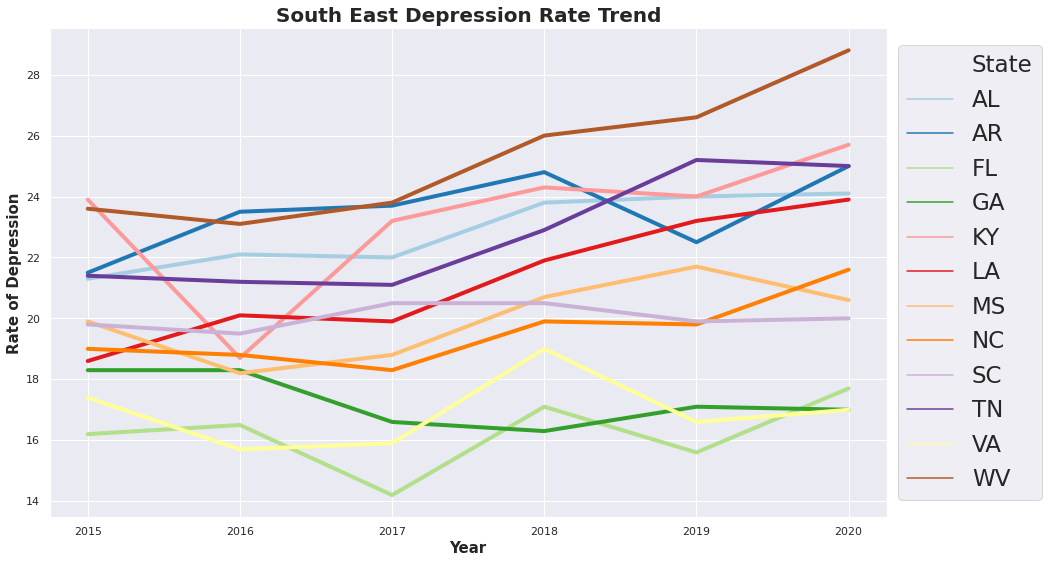

In [28]:
# plot the average depression rates of states within South East region from 2015 to 2020
se_plot = sns.lineplot(data=d_southeast_df, x='Year', y='Value', hue='State', linewidth=4, palette='Paired')
se_plot = se_plot.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=23)
se_plot = plt.ylabel("Rate of Depression", size=15, fontweight='bold')
se_plot = plt.xlabel('Year', size=15, fontweight='bold')
se_plot = plt.title('South East Depression Rate Trend', size=20, fontweight='bold')

This graph gives the average rate of depression for each state in the South Eastern region across the 6 years we are evaluating. As we see, there's quite a lot of variability for this region in terms of depression rates. Most notably, West Virginia is seen to have the highest rate of depression (24-28) and it is also the coldest state in the region with 3 warm months a year. On the flip, Florida has a relatively low rate of depression and is one of warmest states in the region. Generally speaking, there is not a very clear trend with the South Eastern data as the 3 states with the lowest rates of depression (GA, FL, and VA) are not the 3 warmest states of the region (only Florida (FL) being one of the warmest states).

Within this region, we can't really see a relationship between the number of warm months a state has a year and the rate of depression the state has.

## Regressions

This is a general comparison between the warm month count and the depression rate for each year across all 49 states. Generally, we see a negative correlation between warm month count and depression rate, however some years show a stronger correlation (ex: 2016) than others (ex: 2018). This visualization cannot answer our question on its own, but it does provide evidence that a negative relationship is present.

Text(0, 0.5, 'Depression Rate')

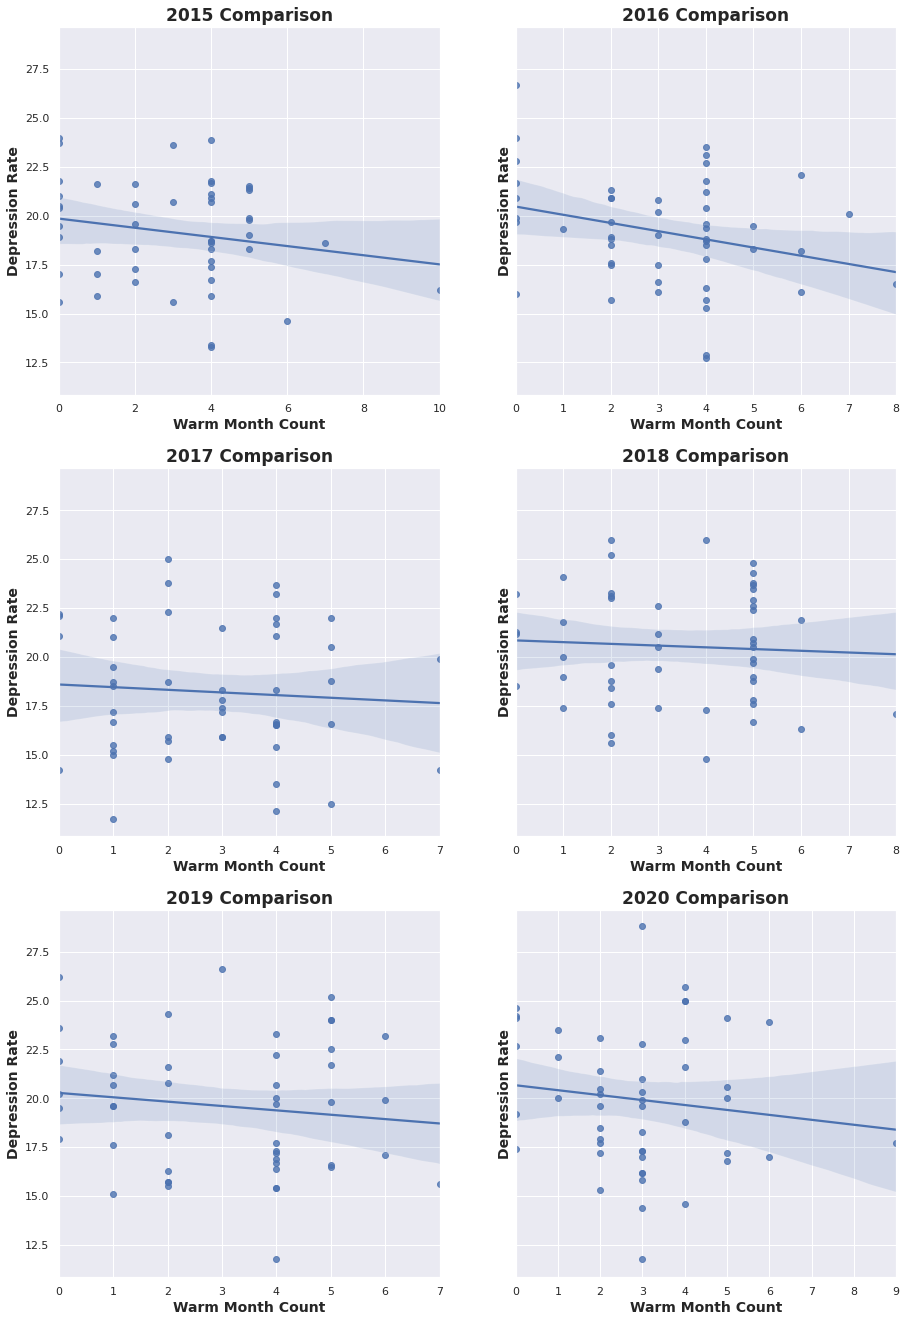

In [29]:
# make separate dataframes according to the observations
# in the 'Year' column in combined dataframe
com_2015 = combined[combined['Year']==2015]
com_2016 = combined[combined['Year']==2016]
com_2017 = combined[combined['Year']==2017]
com_2018 = combined[combined['Year']==2018]
com_2019 = combined[combined['Year']==2019]
com_2020 = combined[combined['Year']==2020]

# Using the six dataframes created above, plot subplots of warm month count 
# and depression rate comparisons for all 49 states in the dataframes.
fig, ax = plt.subplots(nrows=3, ncols=2, sharey=True, figsize=[15,23])

# subplot for year 2015 and fine tune the plot
sns.regplot(x='Warm_Month', y = 'Value', data=com_2015, ax=ax[0,0])
ax[0,0].set_title('2015 Comparison', fontweight="bold", fontsize=17)
ax[0,0].set_xlabel('Warm Month Count', fontweight="bold", fontsize=14)
ax[0,0].set_ylabel('Depression Rate', fontweight="bold", fontsize=14)

# subplot for year 2016 and fine tune the plot
sns.regplot(x='Warm_Month', y = 'Value', data=com_2016, ax=ax[0,1])
ax[0,1].set_title('2016 Comparison', fontweight="bold", fontsize=17)
ax[0,1].set_xlabel('Warm Month Count', fontweight="bold", fontsize=14)
ax[0,1].set_ylabel('Depression Rate', fontweight="bold", fontsize=14)

# subplot for year 2017 and fine tune the plot
sns.regplot(x='Warm_Month', y = 'Value', data=com_2017, ax=ax[1,0])
ax[1,0].set_title('2017 Comparison', fontweight="bold", fontsize=17)
ax[1,0].set_xlabel('Warm Month Count', fontweight="bold", fontsize=14)
ax[1,0].set_ylabel('Depression Rate', fontweight="bold", fontsize=14)

# subplot for year 2018 and fine tune the plot
sns.regplot(x='Warm_Month', y = 'Value', data=com_2018, ax=ax[1,1])
ax[1,1].set_title('2018 Comparison', fontweight="bold", fontsize=17)
ax[1,1].set_xlabel('Warm Month Count', fontweight="bold", fontsize=14)
ax[1,1].set_ylabel('Depression Rate', fontweight="bold", fontsize=14)

# subplot for year 2019 and fine tune the plot
sns.regplot(x='Warm_Month', y = 'Value', data=com_2019, ax=ax[2,0])
ax[2,0].set_title('2019 Comparison', fontweight="bold", fontsize=17)
ax[2,0].set_xlabel('Warm Month Count', fontweight="bold", fontsize=14)
ax[2,0].set_ylabel('Depression Rate', fontweight="bold", fontsize=14)

# subplot for year 2020 and fine tune the plot
sns.regplot(x='Warm_Month', y = 'Value', data=com_2020, ax=ax[2,1])
ax[2,1].set_title('2020 Comparison', fontweight="bold", fontsize=17)
ax[2,1].set_xlabel('Warm Month Count', fontweight="bold", fontsize=14)
ax[2,1].set_ylabel('Depression Rate', fontweight="bold", fontsize=14)

## Hypothesis Testing
We performed two Anova tests on our "combined" dataframe. Both tests use the rate of depression each year for each state as values to test. Each test makes an assumption that the average depression rate for each state, and count of warm months, are equal across the six years and tests against the alternative, which assumes at least one value is off. Traditionally, the p-value we acquire from the tests must be greater than 0.05 to keep the null hypothesis when conducting ANOVA tests. If we get any p-value that's below, we favor the alternative, meaning that the averages are not equal.

In [30]:
# importing libraries for ANOVA tests
import statsmodels.api as sm
from statsmodels.formula.api import ols

# casting warm_month values to be objects to differentiate them as groups for ANOVA test
h_combined = combined
h_combined["Warm_Month"] = h_combined["Warm_Month"].astype('object')

# Anova test on number of Warm Months with depression rate being tested on. 
# Viewing if the average depression rate is equal across values of warm months
model = ols('Value ~ Warm_Month', data=h_combined).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                 sum_sq     df         F    PR(>F)
Warm_Month   226.041122   10.0  2.356267  0.010934
Residual    2714.872620  283.0       NaN       NaN


### Analysis
In this test, we are assuming that the average rate of depression across the states that have a certain count of warm months in a given year is equal. The alternative is that at least one count of warm month does not have an equal average rate of depression. Since we have a p-value that's below 0.05 (0.01 to be exact), we have that we reject the null hypothesis in favor of the alternative. So it appears that each value count of warm months does NOT have an equal average rate of depression, the values are different across another. Now this doesn't mean our claim that the rate of depression is more, or less, across increasing counts of warm months in a given year, but we have further anaylsis proving that the average rate of depression for a state in a given year is different across the total number of warm months a state has. 

In [31]:
# Anova test on US states with depression rate being tested on.
# Viewing if the average depression rate is equal across states
model = ols('Value ~ State', data=combined).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

               sum_sq     df          F        PR(>F)
State     2377.263741   48.0  21.527456  3.465626e-64
Residual   563.650000  245.0        NaN           NaN


### Analysis

In this test, we are assuming the average rate of depression across the states in the 6 years we evaluate are equal. The alternative is that at least one state will have an average rate of depression that is not equal to the other depression rates. Since we have a p-value of practically 0, we reject the null in favor of the alternative. It appears that the depression rate across the states over the years is not the same, or equal. It's important to note that we already knew this to some extent, but this test shows that the rates of depression across each state do differ a significant amount to not quantify them as the same. Now again, this doesn't prove our claim directly, but we have further anaylsis proving that the average rate of depression for each state in a given year differs across the states, and it is NOT the same or equal.

# Ethics & Privacy

While collecting data, our main concerns stemmed from the depression dataset because this data came from people, whereas the weather dataset is archived public information. 

For our depression dataset, our primary concern was that the data we receive must be taken anonymously from each participant or patient that reported. The depression data we used was collected from multiple reputable sources and published on America's Health Rankings with the aim to look at disparities and trends of data overtime; moreover, this data was already aggregated by state and year before published on the website, so we did not see any of the data on the individual-level. Regardless, we were aware that this data could exploit individual's privacy, even if this data is publically available. We thus kept their information as secure as possible by keeping it anonymized. As far as biases are concerned, the variables we imported in our data are only focused on the actual numbers of depression cases, rather than subjective information, so the data obtained is unlikely to be biased in that regard. However, there is the chance that certain individuals with depression were not counted in this data if they were unable to get a formal diagnosis from a doctor, dealt with stigma regarding reporting, etc so it is also important to consider that our depression dataset may not include all individuals who experience depression. To best account for bias, we collected the depression data from a public source (rather than from private hospitals) but we could still be subject to bias which could skew our results.


For our weather dataset, since we are collecting it directly from a public weather repository and the variables we are importing do not deal with individuals, we did not encounter ethical or bias concerns. However, it is important to note that we could not include Hawaii's weather data and thus our sample is exclusionary in that regard.

# Conclusion & Discussion

Our goal was to investigate whether a negative correlation between the number of warm months and the depression rate exists for each of the 49 states. To support our hypothesis, we collected two types of datasets over the years 2015 to 2020: weather and depression data. The weather data measured the average monthly temperature for each of the 49 states in the United States and then determined which months had average temperatures over 68 degrees Fahrenheit (which is standard room temperature). The depression dataset measured the average yearly depression rate for each of the 49 states in the United States.
   
   To test our hypothesis, we first created scatterplots with the best fit regression model line to visually assess the relationship between depression rate and warm months. Based on each year's regression, we could see a slight negative correlation between depression rate and warm months. To take our analysis further, we conducted two ANOVA tests. The first test used the depression rate for each state's number of warm months; when doing the test, we made the assumption that the null hypothesis was true, which is that the depression rate across each warm month count is equal. After running the test we got a p-value that is less than the traditional cut-off point of 0.05. This tells us that we can reject the null hypothesis in favor of the alternative, which in this case means that the depression rate across each of the warm month counts is not equal. The second test used the depression rate for each state across six years; when doing the test, we made the assumption that the null hypothesis was true, which is that the depression rate across each of the states for the 6 year span is equal. After running the test we got a p-value that is almost 0, which means we could reject the null in favor of the alternative. This means that the depression rate against each state over 6 years is not equal. The two ANOVA tests give an indication that the rate of depression for each state, and those with differing count of warm months, are not equal and vary to a degree. Therefore, we can safely confirm that there is a negative correlation between depression rate and warm month count from the regression models as there is a difference between the rates for each warm month count that gives this correlation. 
   
   Ultimately, from out data we can conclude that there is a negative relationship between depression rate and warm months. More specifically, if a state has more warm months, it is typically seen to have a lower depression rate. We cannot formally conclude that more warm months decrease the rate of depression based off of our data alone, however we can see that there is a connection between these variables.

### Limitations

It was our intention to include Hawaii in both the weather and depression datasets, but the source we used to collect the weather data for the 50 states did not have the data for Hawaii. Since we wanted to keep all of our data consistent (in the same format and from the same source) we decided to take out the depression data for Hawaii as well. Since Hawaii is one of the warmest states in the United States, our conclusion is limited by its absence.
Another possible limitation we might have faced was that, since our depression dataset was only from one source, we could have missed parts of the population. We cannot be completely sure if this bias does exist, but it is certainly possible.

   While our limitations affect how generalizable our work is, this project can still be used in future analyses when exploring different factors contributing to mental illness in the United States.

# Team Contributions

- Anthony Quiroga: created functions for importing weather data, hypothesis testing/analysis, North East region visualizations
- June Stancil: background, South West region visualizations
- Lucy Lee: collected/imported weather data, created adding region function, West region visualizations, edited final video
- Millan Kanaya: collected/imported depression data, ethics/privacy, regressions, Midwest region visualizations
- Samuel Lee: conclusion and discussion, limitations, South East region visualizations